Лучшее значение K: 6
Лучшее значение R2 на кросс-валидации: 0.6087573613169451
R2 на тестовой выборке: 0.26044579061820383


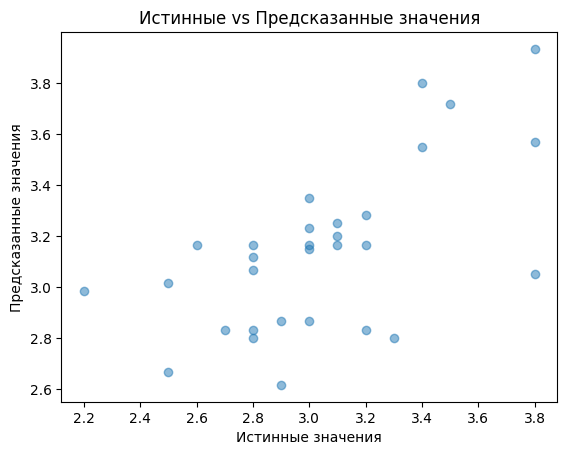

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Загрузка данных
df = pd.read_csv(r"C:\Users\swer\Downloads\Iris.csv")

# Удаление ненужных столбцов (Id и Species, так как они не нужны для регрессии)
X = df.drop(columns=['Id', 'SepalWidthCm', 'Species'])  # Признаки — все, кроме целевой переменной и категорий
y = df['SepalWidthCm']  # Целевая переменная — ширина чашелистика

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели KNN для регрессии
knn = KNeighborsRegressor()

# Определение диапазона значений K для проверки
param_grid = {'kneighborsregressor__n_neighbors': range(1, 21)}

# Создание пайплайна, который сначала стандартизирует данные, а затем применяет KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('kneighborsregressor', knn)   # Модель KNN
])

# Настройка GridSearchCV для поиска оптимального K
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Получение лучшего значения K и оценка модели
best_k = grid_search.best_params_['kneighborsregressor__n_neighbors']
print(f"Лучшее значение K: {best_k}")
print(f"Лучшее значение R2 на кросс-валидации: {grid_search.best_score_}")

# Оценка на тестовой выборке
y_pred = grid_search.predict(X_test)
print(f"R2 на тестовой выборке: {r2_score(y_test, y_pred)}")

# Визуализация предсказанных и истинных значений
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()


In [2]:
from sklearn.linear_model import LinearRegression

# Создание модели линейной регрессии
lin_reg = LinearRegression()

# Обучение модели
lin_reg.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_lin = lin_reg.predict(X_test)

# Оценка модели
print(f"R2 для линейной регрессии на тестовой выборке: {r2_score(y_test, y_pred_lin)}")


R2 для линейной регрессии на тестовой выборке: 0.3936567959676198


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение модели случайного леса
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_rf = rf_reg.predict(X_test)

# Оценка модели
print(f"R2 для случайного леса на тестовой выборке: {r2_score(y_test, y_pred_rf)}")


R2 для случайного леса на тестовой выборке: -0.04122638371129472


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Определение параметров для подбора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели случайного леса
rf = RandomForestRegressor(random_state=42)

# Настройка GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Обучение модели на тренировочных данных
grid_search_rf.fit(X_train, y_train)

# Получение лучших параметров
best_rf_params = grid_search_rf.best_params_
print(f"Лучшие параметры случайного леса: {best_rf_params}")

# Оценка на тестовой выборке
y_pred_rf_best = grid_search_rf.predict(X_test)
print(f"R2 для случайного леса с подобранными параметрами на тестовой выборке: {r2_score(y_test, y_pred_rf_best)}")


Лучшие параметры случайного леса: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
R2 для случайного леса с подобранными параметрами на тестовой выборке: 0.141884609316954


In [5]:
feature_importances = grid_search_rf.best_estimator_.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'{feature}: {importance}')


SepalLengthCm: 0.30391228567475703
PetalLengthCm: 0.33785166081053125
PetalWidthCm: 0.3582360535147117


In [7]:
X_selected = X[['PetalLengthCm', 'PetalWidthCm']]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Разделение данных на обучающую и тестовую выборки с важными признаками
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Обучение и оценка линейной регрессии
lr = LinearRegression()
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)

print(f"R2 для линейной регрессии с важными признаками: {r2_score(y_test, y_pred_lr)}")


R2 для линейной регрессии с важными признаками: 0.1945393803513129


In [9]:
X_selected['PetalArea'] = X_selected['PetalLengthCm'] * X_selected['PetalWidthCm']
X_selected['PetalLengthSquared'] = X_selected['PetalLengthCm'] ** 2


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_selected, y_train)

print(f"Лучшие параметры случайного леса с важными признаками: {grid_search.best_params_}")
print(f"Лучшее значение R2 на кросс-валидации: {grid_search.best_score_}")


Лучшие параметры случайного леса с важными признаками: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Лучшее значение R2 на кросс-валидации: 0.3748620123617894


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Создание и обучение модели с лучшими параметрами
rf_best = RandomForestRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
rf_best.fit(X_train, y_train)

# Прогнозирование и оценка на тестовой выборке
y_pred_test = rf_best.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"R2 на тестовой выборке для оптимизированного случайного леса: {r2_test}")


R2 на тестовой выборке для оптимизированного случайного леса: 0.18290428061353792


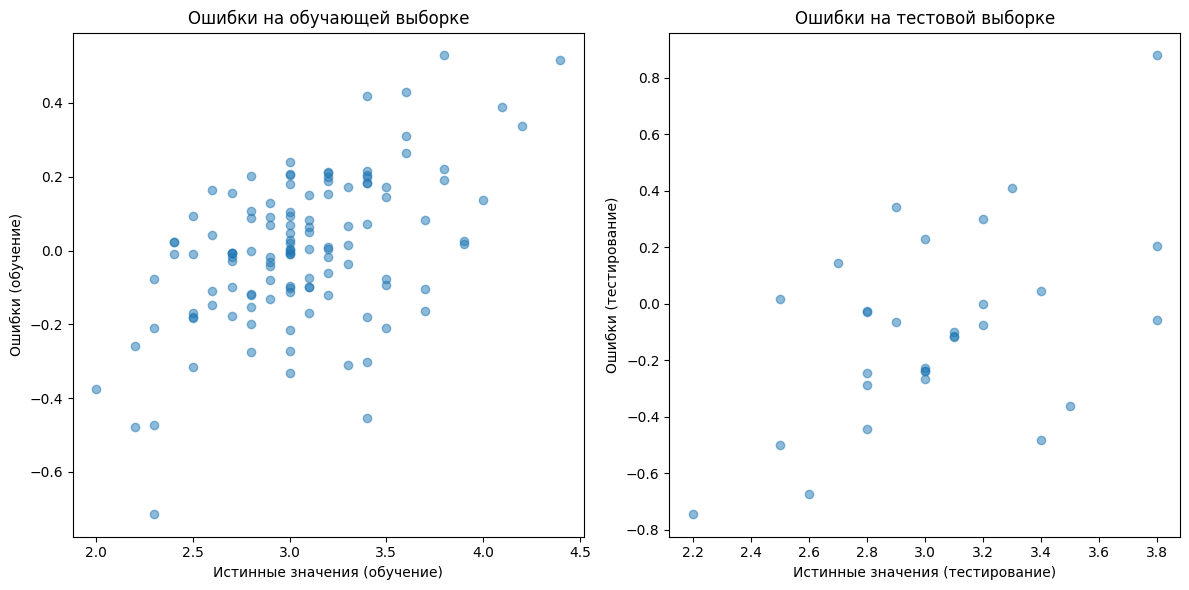

In [12]:
import matplotlib.pyplot as plt

# Ошибки модели на обучающих данных
y_pred_train = rf_best.predict(X_train)
train_errors = y_train - y_pred_train

# Ошибки модели на тестовых данных
y_pred_test = rf_best.predict(X_test)
test_errors = y_test - y_pred_test

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_errors, alpha=0.5)
plt.xlabel('Истинные значения (обучение)')
plt.ylabel('Ошибки (обучение)')
plt.title('Ошибки на обучающей выборке')

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_errors, alpha=0.5)
plt.xlabel('Истинные значения (тестирование)')
plt.ylabel('Ошибки (тестирование)')
plt.title('Ошибки на тестовой выборке')

plt.tight_layout()
plt.show()


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print(f"R2 для GradientBoostingRegressor на тестовой выборке: {r2_score(y_test, y_pred_gbr)}")


R2 для GradientBoostingRegressor на тестовой выборке: -0.0961444703195018


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

print(f"Лучшие параметры для GradientBoostingRegressor: {grid_search.best_params_}")
print(f"R2 для GradientBoostingRegressor на тестовой выборке: {r2_score(y_test, y_pred_gbr)}")


Лучшие параметры для GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
R2 для GradientBoostingRegressor на тестовой выборке: 0.18408650237523017


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)

print(f"MSE для GradientBoostingRegressor на тестовой выборке: {mse}")
print(f"MAE для GradientBoostingRegressor на тестовой выборке: {mae}")


MSE для GradientBoostingRegressor на тестовой выборке: 0.11673002439351704
MAE для GradientBoostingRegressor на тестовой выборке: 0.26095952338506556


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Определение диапазона значений параметров для проверки
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

print(f"Лучшие параметры для GradientBoostingRegressor: {grid_search.best_params_}")
print(f"R2 для GradientBoostingRegressor на тестовой выборке: {r2_score(y_test, y_pred_gbr)}")


Лучшие параметры для GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
R2 для GradientBoostingRegressor на тестовой выборке: 0.18408650237523017


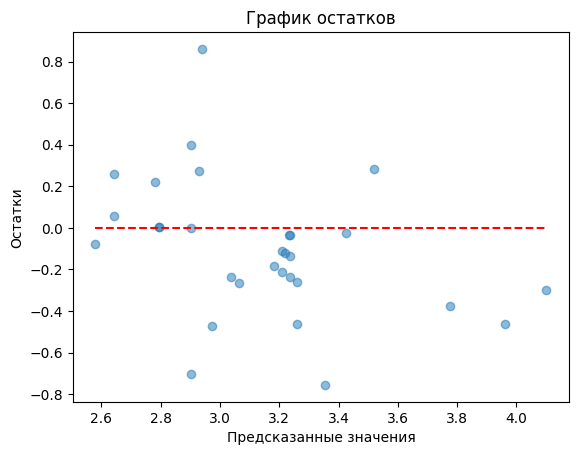

In [18]:
import matplotlib.pyplot as plt

# Рассчитайте остатки
residuals = y_test - y_pred_gbr

# Постройте график остатков
plt.scatter(y_pred_gbr, residuals, alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred_gbr), xmax=max(y_pred_gbr), colors='r', linestyles='dashed')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()
